# COMP5623 Coursework on Image Caption Generation

Starter code.



## Text preparation 

We need to build a vocabulary.

In [0]:
# Mounted Drive if using Colab; otherwise, your local path
root = "drive/My Drive/Flickr8k_Dataset/" # <--- replace this with your root data directory
caption_dir = root + "captions/"                       # <--- replace these too
image_dir = root + "images/"                           # <---


token_file = "Flickr8k.token.txt"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

A helper function to read in our ground truth text file.

In [0]:
def read_lines(filepath):
    """ Open the ground truth captions into memory, line by line. """
    file = open(filepath, 'r')
    lines = []

    while True: 
        # Get next line from file until there's no more
        line = file.readline() 
        if not line: 
            break
        lines.append(line.strip())
    file.close() 
    return lines

You can read all the ground truth captions (5 per image), into memory as follows:

In [0]:
lines = read_lines(caption_dir + token_file)

Extract all the words from ```lines```, and create a list of them in a variable ```words```, for example:

```words = ["a", "an", "the", "cat"... ]```

No need to worry about duplicates.


In [5]:
lines[:5]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .']

In [0]:
class Vocabulary(object):
    """Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # Intially, set both the IDs and words to empty dictionaries.
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        # If the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # Increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # If we try to access a word in the dictionary which does not exist, return the <unk> id
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [0]:

import string 
import collections

def word_extraction(lines):  
  words_temp = []
  for line in lines:
  #Splitting the line into sentences and the name of the image
    temp_split = line.split("\t")
  #Removing the punctuations
    temp_strip = temp_split[1].translate(str.maketrans('', '', string.punctuation))
    temp = temp_strip.lower().split()
    words_temp.extend(temp)
  
  #Counting the number of words in list words_extend
  frequency = collections.Counter(words_temp)
  #Check if the frequency of words is less than or equal to 3
  less = [k for (k,v) in frequency.items() if v <= 3 ]
  #Remove the duplicates
  wordsInLine = set(words_temp)

  #remove the words with less than 3 frequency
  for k in less:
    wordsInLine.remove(k)
  
  return list(wordsInLine)



In [8]:
'''
#Removing punctiations and capital letters
#Creating a dictonary for words
import re

#string.punctuation = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
words = {}

for line in lines:
  wordsinLine = re.split(r'\W+', line)
  for word in wordsinLine[3:-1]:
    if not word.lower() in words: # alternative logic
      words[word.lower()] = 1
    else:
      words[word.lower()] += 1
'''

'\n#Removing punctiations and capital letters\n#Creating a dictonary for words\nimport re\n\n#string.punctuation = \'!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~\'\nwords = {}\n\nfor line in lines:\n  wordsinLine = re.split(r\'\\W+\', line)\n  for word in wordsinLine[3:-1]:\n    if not word.lower() in words: # alternative logic\n      words[word.lower()] = 1\n    else:\n      words[word.lower()] += 1\n'

Build the vocabulary.

In [9]:
# Create a vocab instance
vocab = Vocabulary()

# Add the token words first
vocab.add_word('<pad>')
vocab.add_word('<start>')
vocab.add_word('<end>')
vocab.add_word('<unk>')

wordsInLine = word_extraction(lines)
for word in wordsInLine:
  vocab.add_word(word)

wordsInLine[:100]

['car',
 'staring',
 'cyclists',
 'enjoy',
 'blocks',
 'family',
 'cycling',
 'sundown',
 'handles',
 'dragged',
 'pier',
 'hot',
 'sacks',
 'lifts',
 'corndogs',
 'husky',
 'embankment',
 'horseshoes',
 'multicolored',
 'native',
 'treads',
 'upon',
 'pulled',
 'onehanded',
 'preparing',
 'joy',
 'rollerskating',
 'candy',
 'rolling',
 'climbs',
 'shawl',
 'has',
 'twisting',
 'merchandise',
 'boxer',
 'his',
 'accordion',
 'emerges',
 'reddish',
 'parachute',
 'medium',
 'emerging',
 'sledge',
 'tongue',
 'alligator',
 'bat',
 'along',
 'reads',
 'hooping',
 'rug',
 'jagged',
 'pro',
 'cannon',
 'classic',
 'displays',
 'leads',
 'wide',
 'mets',
 'records',
 'seats',
 'spots',
 'speaks',
 'cheeks',
 'bowling',
 'diners',
 'wooden',
 'performers',
 'claus',
 'him',
 'tunnel',
 'mickey',
 'school',
 'squats',
 'skating',
 'spotted',
 'rival',
 'kids',
 'training',
 'waiter',
 'that',
 'balances',
 'electrical',
 'i',
 'blankets',
 'teen',
 'paper',
 'league',
 'skipping',
 'limb',
 'o

Add the rest of the words from the parsed captions:

``` vocab.add_word('new_word')```

Don't add words that appear three times or less.

In [10]:
print(vocab.__len__())

3440


## Dataset and loaders for training

Keeping the same order, concatenate all the cleaned words from each caption into a string again, and add them all to a list of strings ```cleaned_captions```. Store all the image ids in a list ```image_ids```.

In [11]:
#Generating cleaned captions
cleaned_captions = [] 
image_ids = []


for line in lines:
    new_line = line.split('\t')
    #Extract Image ids
    image = new_line[0].split('.')
    image_ids.append(image[0])

    temp_strip = new_line[1].translate(str.maketrans('', '', string.punctuation))
    temp = temp_strip.lower()
    cleaned_captions.append(temp[:-1])

ids = set(image_ids)
#image_ids = list(dict.fromkeys(image_ids)) # to remove duplicate ids
print("Number of Image IDs: ",len(image_ids))
print("Number of Captions: ",len(cleaned_captions))
print(image_ids[:12])
print(cleaned_captions[:12])


Number of Image IDs:  40455
Number of Captions:  40455
['1000268201_693b08cb0e', '1000268201_693b08cb0e', '1000268201_693b08cb0e', '1000268201_693b08cb0e', '1000268201_693b08cb0e', '1001773457_577c3a7d70', '1001773457_577c3a7d70', '1001773457_577c3a7d70', '1001773457_577c3a7d70', '1001773457_577c3a7d70', '1002674143_1b742ab4b8', '1002674143_1b742ab4b8']
['a child in a pink dress is climbing up a set of stairs in an entry way', 'a girl going into a wooden building', 'a little girl climbing into a wooden playhouse', 'a little girl climbing the stairs to her playhouse', 'a little girl in a pink dress going into a wooden cabin', 'a black dog and a spotted dog are fightin', 'a black dog and a tricolored dog playing with each other on the road', 'a black dog and a white dog with brown spots are staring at each other in the street', 'two dogs of different breeds looking at each other on the road', 'two dogs on pavement moving toward each other', 'a little girl covered in paint sits in front o

The dataframe for the image paths and captions.

In [0]:
import pandas as pd

data = {
    'image_id': image_ids,
    'path': [image_dir + image_id + ".jpg" for image_id in image_ids],
    'caption': cleaned_captions
}

data_df = pd.DataFrame(data, columns=['image_id', 'path', 'caption'])

In [13]:
data_df.head(n=5)

,image_id,path,caption
0,1000268201_693b08cb0e,drive/My Drive/Flickr8k_Dataset/images/1000268...,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e,drive/My Drive/Flickr8k_Dataset/images/1000268...,a girl going into a wooden building
2,1000268201_693b08cb0e,drive/My Drive/Flickr8k_Dataset/images/1000268...,a little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e,drive/My Drive/Flickr8k_Dataset/images/1000268...,a little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e,drive/My Drive/Flickr8k_Dataset/images/1000268...,a little girl in a pink dress going into a woo...


This is the Flickr8k class for the dataset.

In [0]:
from PIL import Image
import cv2
from nltk import tokenize
from torch.utils.data import Dataset, DataLoader

class Flickr8k(Dataset):
    """ Flickr8k custom dataset compatible with torch.utils.data.DataLoader. """
    
    def __init__(self, df, vocab, transform=None):
        """ Set the path for images, captions and vocabulary wrapper.
        
        Args:
            df: df containing image paths and captions.
            vocab: vocabulary wrapper.
            transform: image transformer.
        """
        self.df = df
        self.vocab = vocab
        self.transform = transform

    def __getitem__(self, index):
        """ Returns one data pair (image and caption). """

        vocab = self.vocab

        caption = self.df['caption'][index]
        img_id = self.df['image_id'][index]
        path = self.df['path'][index]

        image = Image.open(open(path, 'rb'))

        if self.transform is not None:
            image = self.transform(image)

        # Convert caption (string) to word ids.
        tokens = caption.split()
        caption = []
        # Build the Tensor version of the caption, with token words
        caption.append(vocab('<start>'))
        caption.extend([vocab(token) for token in tokens])
        caption.append(vocab('<end>'))
        target = torch.Tensor(caption)
        return image, target

    def __len__(self):
        return len(self.df)

We need to overwrite the default PyTorch ```collate_fn()``` because our ground truth captions are sequential data of varying lengths. The default ```collate_fn()``` does not support merging the captions with padding.

You can read more about it here: https://pytorch.org/docs/stable/data.html#dataloader-collate-fn. 

In [0]:
def caption_collate_fn(data):
    """ Creates mini-batch tensors from the list of tuples (image, caption).
    Args:
        data: list of tuple (image, caption). 
            - image: torch tensor of shape (3, 256, 256).
            - caption: torch tensor of shape (?); variable length.
    Returns:
        images: torch tensor of shape (batch_size, 3, 256, 256).
        targets: torch tensor of shape (batch_size, padded_length).
        lengths: list; valid length for each padded caption.
    """
    # Sort a data list by caption length from longest to shortest.
    data.sort(key=lambda x: len(x[1]), reverse=True)
    images, captions = zip(*data)

    # Merge images (from tuple of 3D tensor to 4D tensor).
    images = torch.stack(images, 0)

    # Merge captions (from tuple of 1D tensor to 2D tensor).
    lengths = [len(cap) for cap in captions]
    targets = torch.zeros(len(captions), max(lengths)).long()
    for i, cap in enumerate(captions):
        end = lengths[i]
        targets[i, :end] = cap[:end]        
    return images, targets, lengths

Now we define the data transform.

In [0]:
import torch
from torchvision import transforms

# Crop size matches the input dimensions expected by the pre-trained ResNet
data_transform = transforms.Compose([ 
    transforms.Resize(224),
    transforms.CenterCrop(224),  # Why do we choose 224 x 224?
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # Using ImageNet norms
                         (0.229, 0.224, 0.225))])

Initialising the datasets. The only twist is that every image has 5 ground truth captions, so each image appears five times in the dataframe. We don't want an image to appear in more than one set.

In [0]:
unit_size = 5

train_split = 0.95 # Defines the ratio of train/test data.

# We didn't shuffle the dataframe yet so this works
train_size = unit_size * round(len(data_df)*train_split / unit_size)

dataset_train = Flickr8k(
    df=data_df[:train_size].reset_index(drop=True),
    vocab=vocab,
    transform=data_transform,
)

dataset_test = Flickr8k(
    df=data_df[(train_size):].reset_index(drop=True),
    vocab=vocab,
    transform=data_transform,
)

Write the dataloaders ```train_loader``` and ```test_loader``` - explicitly replacing the collate_fn:

```train_loader = torch.utils.data.DataLoader(
  ...,
  collate_fn=caption_collate_fn
)```

Set train batch size to 128 and be sure to set ```shuffle=True```

In [0]:
train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=128,
    shuffle=True,
    num_workers=2,
    collate_fn=caption_collate_fn
)

test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=128,
    shuffle=False,
    num_workers=2,
    collate_fn=caption_collate_fn
)

## Encoder and decoder models

In [0]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence

class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True) # Pre-trained on ImageNet by default
        layers = list(resnet.children())[:-1]      # Keep all layers except the last one
        # Unpack the layers and create a new Sequential
        self.resnet = nn.Sequential(*layers)
        
        # We want a specific output size, which is the size of our embedding, so
        # we feed our extracted features from the last fc layer (dimensions 1 x 1000)
        # into a Linear layer to resize
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)
        
        # Batch normalisation helps to speed up training
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        
    def forward(self, images):
        """Extract feature vectors from input images."""
        with torch.no_grad():
            features = self.resnet(images)
        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))
        return features


class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=20):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        
        # What is an embedding layer?
        self.embed = nn.Embedding(vocab_size, embed_size)

        # Define this layer (one at a time)
        # self.lstm / self.rnn
        #self.lstm = nn.RNN(embed_size, hidden_size, num_layers, batch_first=True) #For RNN
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True) # For LSTM
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length
        
    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)
        # What is "packing" a padded sequence?
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True) 
        hiddens, _ = self.lstm(packed) #For LSTM & rnn
        
        outputs = self.linear(hiddens[0])
        return outputs
    
    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.lstm(inputs, states)          # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))            # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)                        # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)                       # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                         # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)                # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids

In [20]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Set training parameters.

In [0]:
embed_size = 256
hidden_size = 512
num_layers = 1
learning_rate = 0.001
num_epochs = 5
log_step = 10
save_step = 300

Initialize the models and set the learning parameters.

In [0]:
import numpy as np

# Build the models
encoder = EncoderCNN(embed_size).to(device)
decoder = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()

# Optimisation will be on the parameters of BOTH the enocder and decoder,
# but excluding the ResNet parameters, only the new added layers.
params = list(
    decoder.parameters()) + list(encoder.linear.parameters()) + list(encoder.bn.parameters()
)

optimizer = torch.optim.Adam(params, lr=learning_rate)


## Training the model

In [0]:
#Display the images, reference captions and generated captions

import tensorflow as tf

def display_cap_image(image, ref_caption, gener_caption):
  from matplotlib import pyplot as plt

  #Generating reference caption
  reference_caption = []
  for cap in ref_caption:
    sentence = ""
    for index in cap[1:-1]:
      sentence = sentence + vocab.idx2word[int(index)] + " "
    reference_caption.append(sentence)

  #Generating generated caption
  #caption = caption.to(device)
  generated_caption = ""
  for cap in gener_caption[1:]:
    wrd = vocab.idx2word[int(cap)]
    if(wrd!='<unk>') and (wrd!='<pad>'):
      if(wrd=='<end>'):
        break
      else:
        generated_caption += wrd+" "
  generated_caption = generated_caption[:-1]
  
  print("\nReference Captions: ") #+ ",".join(reference_caption))
  for idx in reference_caption:
    print(idx)

  unnorm = transforms.Compose([ 
        transforms.Normalize((0., 0., 0.), (1/0.229, 1/0.224, 1/0.225)),
        transforms.Normalize((-0.485, -0.456, -0.406), (1., 1., 1.))
    ])
  image = unnorm(image)
 #plt.imshow(torchvision.utils.make_grid((image1*255), nrow=5).permute(1, 2, 0))
  plt.imshow(tf.convert_to_tensor(np.rollaxis(image.numpy(), 0, 3)))
  plt.show()

  print("\nGenerated Caption: "+generated_caption)
  
  return reference_caption,generated_caption



In [0]:
def bleu_scores(reference_cap, hypothesis):
  from nltk.translate.bleu_score import SmoothingFunction
  from nltk.translate.bleu_score import sentence_bleu 
  gen_cap_wordlist = hypothesis.split(" ")
  
  ref_caps = []

  for cap in reference_cap:
    ref_caps.append(cap.split(" "))

  for cap in reference_cap:
    for wrd in cap:
      if wrd == '<unk>':
        cap.remove(wrd)

  score = sentence_bleu(ref_caps, gen_cap_wordlist) #weights=(0.5, 0.25, 0.15, 0.15)

  print("\nBLEU Score:" + str(score))
  

Reference captions, Generated captions and BLEU score before training:

Reference Captions: 
a child playing on the monkey bars at a playground with an adult <unk> 
a girl hangs on the bars 
a kid hangs upside down on the monkey bars at a playground 
a young children hanging upside at the <unk> 
girl hanging upside down on blue monkey bar 


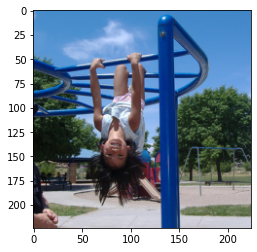


Generated Caption: beige milk pitbull this waterfalls fire direction displays assistance monster santa chased complete perched perched formation o neck owner

BLEU Score:0

Reference Captions: 
a brown and white sheltie leaping over a rail 
a collie is running through an obstacle <unk> 
collie jumping over a training hurdle that is on the grass 
collie making a jump over a yellow hurdle 
the dog is leaping over a hurdle 


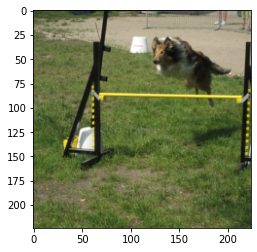


Generated Caption: log round snowboarders kayakers smartly smartly pulley flowers robes curious crosscountry garb returns marching paintings suspended tights round lone

BLEU Score:0

Reference Captions: 
a little girl in a pink hat is playing with a soccer ball 
a young girl is playing with a soccer ball in the grass 
little girl with pink hat playing with a soccer ball 
the little girl wearing a pink hat is bending down to pick up a soccer ball 
young child playing with a soccer ball in a grassy area 


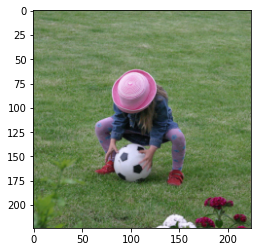


Generated Caption: pop huge bitten rows clowns saxophone ambulance curious crosscountry keeps ring opponent military struggle keeps ring burn listening burn

BLEU Score:0

Reference Captions: 
a little girl running in a <unk> 
a little girl walking on the green grass in front of a big stone 
a small child is in a grassy field near an old structure 
a small child running along the grass with a large <unk> in the <unk> 
a young child walks on the grass away from a stone monument 


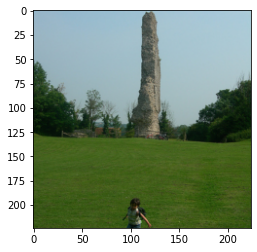


Generated Caption: waterfalls against owner ran floors things scooter pop marches letter hiking tattooed rusty jogs cheeks site bedroom displays rink

BLEU Score:0


'\nreference_caption5, generated_caption5 = display_cap_image(image5, cap5, hypothesis[4])\nscore = bleu_scores(reference_caption5, generated_caption5)\n\nreference_caption6, generated_caption6 = display_cap_image(image6, cap6, hypothesis[5])\nscore = bleu_scores(reference_caption6, generated_caption6)\n\nreference_caption7, generated_caption7 = display_cap_image(image7, cap7, hypothesis[6])\nscore = bleu_scores(reference_caption7, generated_caption7)\n'

In [25]:
image1, _ = test_loader.dataset[0]
image2, _ = test_loader.dataset[5]
image3, _ = test_loader.dataset[10]
image4, _ = test_loader.dataset[15]
image5, _ = test_loader.dataset[20]
image6, _ = test_loader.dataset[25]
image7, _ = test_loader.dataset[30]
cap1,cap2,cap3,cap4,cap5,cap6,cap7 = [],[],[],[],[],[],[]

for idx in range(0,5):
    _, cap = test_loader.dataset[idx]
    cap1.append(cap)

for idx in range(5,10):
    _, cap = test_loader.dataset[idx]
    cap2.append(cap)

for idx in range(10,15):
    _, cap = test_loader.dataset[idx]
    cap3.append(cap)

for idx in range(15,20):
    _, cap = test_loader.dataset[idx]
    cap4.append(cap)

for idx in range(20,25):
    _, cap = test_loader.dataset[idx]
    cap5.append(cap)

for idx in range(25,30):
    _, cap = test_loader.dataset[idx]
    cap6.append(cap)

for idx in range(30,35):
    _, cap = test_loader.dataset[idx]
    cap7.append(cap)

print("Reference captions, Generated captions and BLEU score before training:")
#Displaying images, generating reference caption and BLEU score before training
images = [image1, image2, image3, image4, image5, image6, image7]
images = torch.stack(images, 0)
images = images.to(device)
image_features = encoder(images)
hypothesis = decoder.sample(image_features)

reference_caption1, generated_caption1 = display_cap_image(image1, cap1, hypothesis[0])
score = bleu_scores(reference_caption1, generated_caption1)

reference_caption2, generated_caption2 = display_cap_image(image2, cap2, hypothesis[1])
score = bleu_scores(reference_caption2, generated_caption2)

#Testing for additional 5 images
reference_caption3, generated_caption3 = display_cap_image(image3, cap3, hypothesis[2])
score = bleu_scores(reference_caption3, generated_caption3)

reference_caption4, generated_caption4 = display_cap_image(image4, cap4, hypothesis[3])
score = bleu_scores(reference_caption4, generated_caption4)

reference_caption5, generated_caption5 = display_cap_image(image5, cap5, hypothesis[4])
score = bleu_scores(reference_caption5, generated_caption5)

reference_caption6, generated_caption6 = display_cap_image(image6, cap6, hypothesis[5])
score = bleu_scores(reference_caption6, generated_caption6)

reference_caption7, generated_caption7 = display_cap_image(image7, cap7, hypothesis[6])
score = bleu_scores(reference_caption7, generated_caption7)


In [0]:
def avg_bleu():
  score_sum=0
  print('In Test-loader-data')
  for i, (images, captions, lengths) in enumerate(test_loader):
    reference_caption_test=reference_caption(images)
    generated_caption_test=caption_test_images(images,captions)
    score = sentence_bleu(reference_caption_test, generated_caption_test,weights=(0.25, 0.25,0.25, 0.25))
    score_sum=score_sum+score
  score_sum=score_sum/len(test_loader)
  return score_sum

The loop to train the model. Feel free to put this in a function if you prefer.

Epoch [0/5], Step [0/301], Loss: 8.1595
Epoch [0/5], Step [10/301], Loss: 5.4782
Epoch [0/5], Step [20/301], Loss: 4.9907
Epoch [0/5], Step [30/301], Loss: 4.5874
Epoch [0/5], Step [40/301], Loss: 4.2859
Epoch [0/5], Step [50/301], Loss: 4.1909
Epoch [0/5], Step [60/301], Loss: 4.0339
Epoch [0/5], Step [70/301], Loss: 3.8537
Epoch [0/5], Step [80/301], Loss: 3.8442
Epoch [0/5], Step [90/301], Loss: 3.7949
Epoch [0/5], Step [100/301], Loss: 3.6213
Epoch [0/5], Step [110/301], Loss: 3.5144
Epoch [0/5], Step [120/301], Loss: 3.4787
Epoch [0/5], Step [130/301], Loss: 3.5338
Epoch [0/5], Step [140/301], Loss: 3.4710
Epoch [0/5], Step [150/301], Loss: 3.4227
Epoch [0/5], Step [160/301], Loss: 3.3800
Epoch [0/5], Step [170/301], Loss: 3.4977
Epoch [0/5], Step [180/301], Loss: 3.2344
Epoch [0/5], Step [190/301], Loss: 3.2873
Epoch [0/5], Step [200/301], Loss: 3.4761
Epoch [0/5], Step [210/301], Loss: 3.3805
Epoch [0/5], Step [220/301], Loss: 3.2598
Epoch [0/5], Step [230/301], Loss: 3.3174
Epo

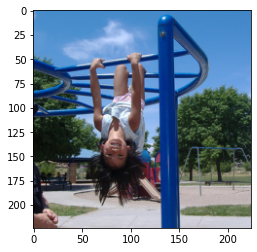


Generated Caption: a man in a blue shirt and a white shirt and a black shirt and a black shirt and

BLEU Score:0.6303647413359293

Reference Captions: 
a brown and white sheltie leaping over a rail 
a collie is running through an obstacle <unk> 
collie jumping over a training hurdle that is on the grass 
collie making a jump over a yellow hurdle 
the dog is leaping over a hurdle 


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


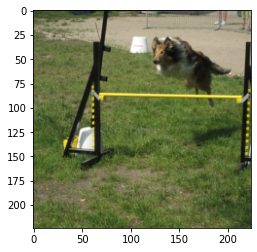


Generated Caption: a dog is running through the snow

BLEU Score:0.46905226098954195

Reference Captions: 
a little girl in a pink hat is playing with a soccer ball 
a young girl is playing with a soccer ball in the grass 
little girl with pink hat playing with a soccer ball 
the little girl wearing a pink hat is bending down to pick up a soccer ball 
young child playing with a soccer ball in a grassy area 


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


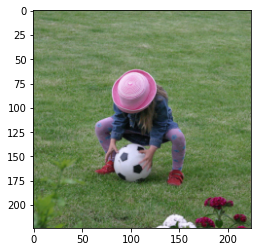


Generated Caption: a man in a blue shirt and a black shirt and a black shirt and a black shirt and

BLEU Score:0.3288580454955831

Reference Captions: 
a little girl running in a <unk> 
a little girl walking on the green grass in front of a big stone 
a small child is in a grassy field near an old structure 
a small child running along the grass with a large <unk> in the <unk> 
a young child walks on the grass away from a stone monument 


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


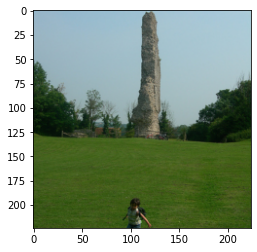


Generated Caption: a man in a blue shirt is jumping over a

BLEU Score:0.4591497693322865
Epoch [1/5], Step [0/301], Loss: 3.0022
Epoch [1/5], Step [10/301], Loss: 2.9968
Epoch [1/5], Step [20/301], Loss: 3.0672
Epoch [1/5], Step [30/301], Loss: 2.8948
Epoch [1/5], Step [40/301], Loss: 3.0420
Epoch [1/5], Step [50/301], Loss: 2.9247
Epoch [1/5], Step [60/301], Loss: 3.0273
Epoch [1/5], Step [70/301], Loss: 2.9936
Epoch [1/5], Step [80/301], Loss: 3.0390
Epoch [1/5], Step [90/301], Loss: 2.8688
Epoch [1/5], Step [100/301], Loss: 2.9681
Epoch [1/5], Step [110/301], Loss: 2.9205
Epoch [1/5], Step [120/301], Loss: 2.9175
Epoch [1/5], Step [130/301], Loss: 2.9627
Epoch [1/5], Step [140/301], Loss: 2.9569
Epoch [1/5], Step [150/301], Loss: 2.9028
Epoch [1/5], Step [160/301], Loss: 2.9378
Epoch [1/5], Step [170/301], Loss: 2.9250
Epoch [1/5], Step [180/301], Loss: 2.9296
Epoch [1/5], Step [190/301], Loss: 2.9479
Epoch [1/5], Step [200/301], Loss: 2.8104
Epoch [1/5], Step [210/301], Loss: 2.8

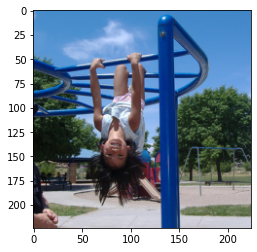


Generated Caption: a young boy in a red shirt is jumping on a skateboard

BLEU Score:0.3838665842168265

Reference Captions: 
a brown and white sheltie leaping over a rail 
a collie is running through an obstacle <unk> 
collie jumping over a training hurdle that is on the grass 
collie making a jump over a yellow hurdle 
the dog is leaping over a hurdle 


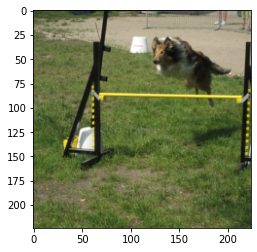


Generated Caption: a dog is running through the grass

BLEU Score:0.5238327117635012

Reference Captions: 
a little girl in a pink hat is playing with a soccer ball 
a young girl is playing with a soccer ball in the grass 
little girl with pink hat playing with a soccer ball 
the little girl wearing a pink hat is bending down to pick up a soccer ball 
young child playing with a soccer ball in a grassy area 


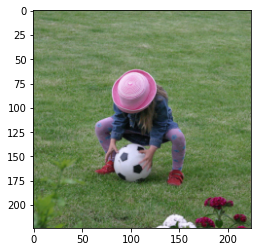


Generated Caption: a young boy in a red shirt is running on a field

BLEU Score:0.5491004867761125

Reference Captions: 
a little girl running in a <unk> 
a little girl walking on the green grass in front of a big stone 
a small child is in a grassy field near an old structure 
a small child running along the grass with a large <unk> in the <unk> 
a young child walks on the grass away from a stone monument 


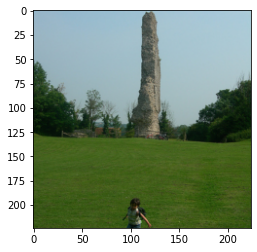


Generated Caption: a man is standing on a bench with a dog on a

BLEU Score:0.40588949514595957
Epoch [2/5], Step [0/301], Loss: 2.6811
Epoch [2/5], Step [10/301], Loss: 2.7597
Epoch [2/5], Step [20/301], Loss: 2.5913
Epoch [2/5], Step [30/301], Loss: 2.7385
Epoch [2/5], Step [40/301], Loss: 2.8722
Epoch [2/5], Step [50/301], Loss: 2.7316
Epoch [2/5], Step [60/301], Loss: 2.6950
Epoch [2/5], Step [70/301], Loss: 2.6609
Epoch [2/5], Step [80/301], Loss: 2.6311
Epoch [2/5], Step [90/301], Loss: 2.6433
Epoch [2/5], Step [100/301], Loss: 2.5408
Epoch [2/5], Step [110/301], Loss: 2.8074
Epoch [2/5], Step [120/301], Loss: 2.6707
Epoch [2/5], Step [130/301], Loss: 2.6316
Epoch [2/5], Step [140/301], Loss: 2.6114
Epoch [2/5], Step [150/301], Loss: 2.5155
Epoch [2/5], Step [160/301], Loss: 2.7123
Epoch [2/5], Step [170/301], Loss: 2.4962
Epoch [2/5], Step [180/301], Loss: 2.6291
Epoch [2/5], Step [190/301], Loss: 2.5296
Epoch [2/5], Step [200/301], Loss: 2.6652
Epoch [2/5], Step [210/301], Los

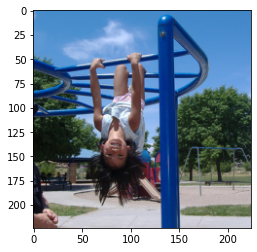


Generated Caption: a little boy in a red shirt is jumping into a pool

BLEU Score:0.5878560343277044

Reference Captions: 
a brown and white sheltie leaping over a rail 
a collie is running through an obstacle <unk> 
collie jumping over a training hurdle that is on the grass 
collie making a jump over a yellow hurdle 
the dog is leaping over a hurdle 


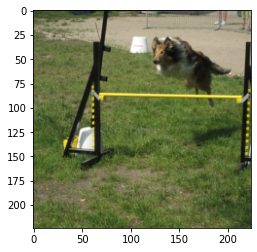


Generated Caption: a dog jumps over a hurdle

BLEU Score:0.38498150077635496

Reference Captions: 
a little girl in a pink hat is playing with a soccer ball 
a young girl is playing with a soccer ball in the grass 
little girl with pink hat playing with a soccer ball 
the little girl wearing a pink hat is bending down to pick up a soccer ball 
young child playing with a soccer ball in a grassy area 


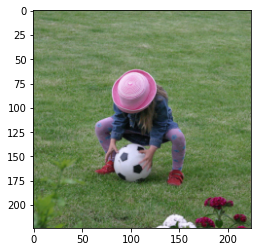


Generated Caption: a little girl in a red shirt is running through a field of grass

BLEU Score:0.29899503549981366

Reference Captions: 
a little girl running in a <unk> 
a little girl walking on the green grass in front of a big stone 
a small child is in a grassy field near an old structure 
a small child running along the grass with a large <unk> in the <unk> 
a young child walks on the grass away from a stone monument 


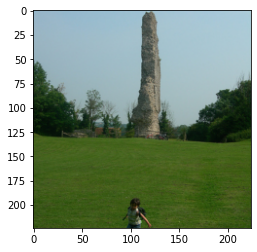


Generated Caption: a man in a black jacket is standing on a

BLEU Score:0.4854917717073234
Epoch [3/5], Step [0/301], Loss: 2.4194
Epoch [3/5], Step [10/301], Loss: 2.4410
Epoch [3/5], Step [20/301], Loss: 2.4662
Epoch [3/5], Step [30/301], Loss: 2.4950
Epoch [3/5], Step [40/301], Loss: 2.4465
Epoch [3/5], Step [50/301], Loss: 2.4322
Epoch [3/5], Step [60/301], Loss: 2.5145
Epoch [3/5], Step [70/301], Loss: 2.4761
Epoch [3/5], Step [80/301], Loss: 2.5903
Epoch [3/5], Step [90/301], Loss: 2.5578
Epoch [3/5], Step [100/301], Loss: 2.4561
Epoch [3/5], Step [110/301], Loss: 2.4225
Epoch [3/5], Step [120/301], Loss: 2.4536
Epoch [3/5], Step [130/301], Loss: 2.4889
Epoch [3/5], Step [140/301], Loss: 2.4520
Epoch [3/5], Step [150/301], Loss: 2.6197
Epoch [3/5], Step [160/301], Loss: 2.3745
Epoch [3/5], Step [170/301], Loss: 2.3611
Epoch [3/5], Step [180/301], Loss: 2.4510
Epoch [3/5], Step [190/301], Loss: 2.5451
Epoch [3/5], Step [200/301], Loss: 2.3618
Epoch [3/5], Step [210/301], Loss: 2.

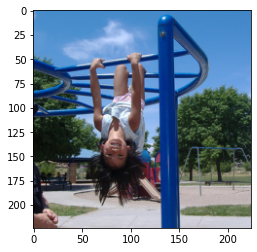


Generated Caption: a child in a blue shirt and blue jeans is jumping on a trampoline

BLEU Score:0.4071220775553065

Reference Captions: 
a brown and white sheltie leaping over a rail 
a collie is running through an obstacle <unk> 
collie jumping over a training hurdle that is on the grass 
collie making a jump over a yellow hurdle 
the dog is leaping over a hurdle 


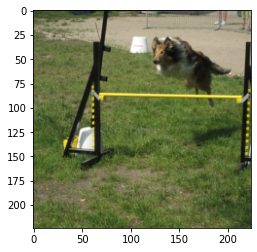


Generated Caption: a dog jumps over a hurdle

BLEU Score:0.38498150077635496

Reference Captions: 
a little girl in a pink hat is playing with a soccer ball 
a young girl is playing with a soccer ball in the grass 
little girl with pink hat playing with a soccer ball 
the little girl wearing a pink hat is bending down to pick up a soccer ball 
young child playing with a soccer ball in a grassy area 


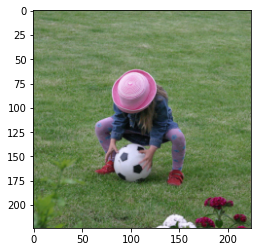


Generated Caption: a little girl in a red and white uniform is running with a soccer ball

BLEU Score:0.42311785416105785

Reference Captions: 
a little girl running in a <unk> 
a little girl walking on the green grass in front of a big stone 
a small child is in a grassy field near an old structure 
a small child running along the grass with a large <unk> in the <unk> 
a young child walks on the grass away from a stone monument 


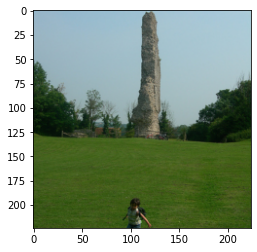


Generated Caption: a man is standing on a sidewalk with a large brown dog

BLEU Score:0.2840930581980631
Epoch [4/5], Step [0/301], Loss: 2.2043
Epoch [4/5], Step [10/301], Loss: 2.2564
Epoch [4/5], Step [20/301], Loss: 2.2722
Epoch [4/5], Step [30/301], Loss: 2.3091
Epoch [4/5], Step [40/301], Loss: 2.3216
Epoch [4/5], Step [50/301], Loss: 2.2765
Epoch [4/5], Step [60/301], Loss: 2.2840
Epoch [4/5], Step [70/301], Loss: 2.2905
Epoch [4/5], Step [80/301], Loss: 2.4144
Epoch [4/5], Step [90/301], Loss: 2.4372
Epoch [4/5], Step [100/301], Loss: 2.4102
Epoch [4/5], Step [110/301], Loss: 2.3638
Epoch [4/5], Step [120/301], Loss: 2.2698
Epoch [4/5], Step [130/301], Loss: 2.2489
Epoch [4/5], Step [140/301], Loss: 2.3499
Epoch [4/5], Step [150/301], Loss: 2.3058
Epoch [4/5], Step [160/301], Loss: 2.2798
Epoch [4/5], Step [170/301], Loss: 2.5032
Epoch [4/5], Step [180/301], Loss: 2.3223
Epoch [4/5], Step [190/301], Loss: 2.3209
Epoch [4/5], Step [200/301], Loss: 2.4013
Epoch [4/5], Step [210/

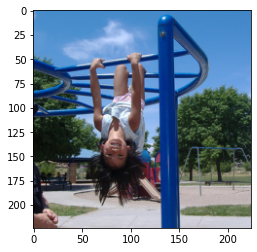


Generated Caption: a young girl is jumping on a trampoline

BLEU Score:0.5466325569645467

Reference Captions: 
a brown and white sheltie leaping over a rail 
a collie is running through an obstacle <unk> 
collie jumping over a training hurdle that is on the grass 
collie making a jump over a yellow hurdle 
the dog is leaping over a hurdle 


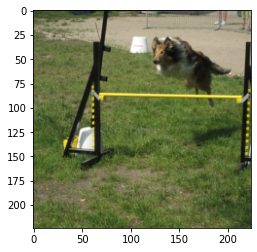


Generated Caption: a dog jumps over a hurdle

BLEU Score:0.38498150077635496

Reference Captions: 
a little girl in a pink hat is playing with a soccer ball 
a young girl is playing with a soccer ball in the grass 
little girl with pink hat playing with a soccer ball 
the little girl wearing a pink hat is bending down to pick up a soccer ball 
young child playing with a soccer ball in a grassy area 


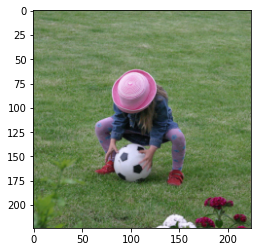


Generated Caption: a young girl is running on the grass

BLEU Score:0.2825677270462821

Reference Captions: 
a little girl running in a <unk> 
a little girl walking on the green grass in front of a big stone 
a small child is in a grassy field near an old structure 
a small child running along the grass with a large <unk> in the <unk> 
a young child walks on the grass away from a stone monument 


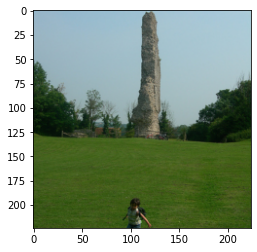


Generated Caption: a man is walking on a snowy path

BLEU Score:0.5466325569645467
End of Trainnig


In [27]:
import torch
import torch.nn as nn
import numpy as np
import os
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import transforms
from nltk.translate.bleu_score import sentence_bleu 

#Train the models
#model_path = root + "Model_Path/"

total_step = len(train_loader)
for epoch in range(num_epochs):
  encoder.train()
  total_loss = 0
  for i, (images, captions, lengths) in enumerate(train_loader):

        # Set mini-batch dataset
        images = images.to(device)
        captions = captions.to(device)

        # Packed as well as we'll compare to the decoder outputs
        targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]

        
        # Forward, backward and optimize
        features = encoder(images)
        outputs = decoder(features, captions, lengths)

        loss = criterion(outputs, targets)
        
        # Zero gradients for both networks
        decoder.zero_grad()
        encoder.zero_grad()

        loss.backward()
        optimizer.step()

        # Print log info
        if i % log_step == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch, num_epochs, i, total_step, loss.item())) 
        total_loss = total_loss+loss.item()
        
  
  encoder.eval()

  images = [image1, image2, image3, image4, image5,image6,image7]
  images = torch.stack(images, 0)
  images = images.to(device)
  image_features = encoder(images)
  hypothesis = decoder.sample(image_features)

  total_loss = total_loss/301     
#print(hypothesis.type())      
  print("\nNumber of each epoch: ", epoch+1)
  print("Total loss after each epoch: ",total_loss)
  print("\nCaption after epoch: ")

  reference_caption1, generated_caption1 = display_cap_image(image1, cap1, hypothesis[0])
  score = bleu_scores(reference_caption1, generated_caption1)

  reference_caption2, generated_caption2 = display_cap_image(image2, cap2, hypothesis[1])
  score = bleu_scores(reference_caption2, generated_caption2)

  reference_caption3, generated_caption3 = display_cap_image(image3, cap3, hypothesis[2])
  score = bleu_scores(reference_caption3, generated_caption3)

  reference_caption4, generated_caption4 = display_cap_image(image4, cap4, hypothesis[3])
  score = bleu_scores(reference_caption4, generated_caption4)

  reference_caption5, generated_caption5 = display_cap_image(image5, cap5, hypothesis[4])
  score = bleu_scores(reference_caption5, generated_caption5)

  reference_caption6, generated_caption6 = display_cap_image(image6, cap6, hypothesis[5])
  score = bleu_scores(reference_caption6, generated_caption6)

  reference_caption7, generated_caption7 = display_cap_image(image7, cap7, hypothesis[6])
  score = bleu_scores(reference_caption7, generated_caption7)

  print(' For epoch: ',epoch+1,' BLEU score for whole test dataset',avg_bleu()) #For Avg BLEU score of test data. Recommended to run the code without this statement first as it takes loads of time to execute, for checking the code validitiy.

'''

        
        # If you want to save the model checkpoints - recommended once you have everything working
        # Make sure to save RNN and LSTM versions separately
        if (i+1) % save_step == 0:
           torch.save(decoder.state_dict(), os.path.join(model_path, 'decoder-{}-{}.ckpt'.format(epoch+1, i+1)))
           torch.save(encoder.state_dict(), os.path.join(model_path, 'encoder-{}-{}.ckpt'.format(epoch+1, i+1)))
        '''
print("End of Trainnig")